In [3]:
!pip install -r requirements.txt

You should consider upgrading via the 'c:\users\z840\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import investpy
import time
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
etfs = investpy.get_etfs(country='united states')

In [6]:
etf_tickers = ["XLB", # Materials. 1998-12-22
               "XLE", # Energy. 1998-12-22
               "XLF", # Financial. 1998-12-22
               "XLI", # Industrial. 1998-12-22
               "XLK", # Technology. 1998-12-22
               "XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
               "XLU", # Utilities. 1998-12-22
               "XLV", # Health Care. 1998-12-22
               "XLY", # Consumer Discretionary. 1998-12-22
               "GLD", # Oro. 2004-11-18 *******************************
               "SHV", # Short Treasury Bond. 2007-01-11 ***************
               "SHY", # 1-3 Year Treasury Bond. 2002-07-30
               "IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
               "IEF", # 7-10 Year Treasury Bond. 2002-07-30
               "TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
               "TLT", # +20 Year Treasury Bond. 2002-07-30
               "TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
               "ICF", # Inmobiliario. 2001-02-02
               "IYZ" # Telecomunicaciones. 2000-05-22
               ]



In [9]:
datayf = yf.download(# tickers list or string as well
        tickers = etf_tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  19 of 19 completed


In [13]:
closeyf = datayf.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

In [15]:
max_first_valid_index = pd.Timestamp('1900-01-01')
for col_name in closeyf.columns.sort_values():
  data = closeyf[col_name]

  if max_first_valid_index < data.first_valid_index():
    max_first_valid_index = data.first_valid_index()

  print(f"{col_name} --> desde {data.first_valid_index()} hasta {data.last_valid_index()} --> {etfs[(etfs.symbol == col_name) & (etfs.country == 'united states')].name.iloc[0]}")

# Descartamos algún dato, para empezar todo desde el mismo punto
closeyf = closeyf.loc[max_first_valid_index:,]
#closeyf.plot(figsize=(20,10))

GLD --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> SPDR Gold Shares
ICF --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares Cohen & Steers REIT
IEF --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares 7-10 Year Treasury Bond
IEI --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares 3-7 Year Treasury Bond
IYZ --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares US Telecommunications
SHV --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares Short Treasury Bond
SHY --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares 1-3 Year Treasury Bond
TIP --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares TIPS Bond
TLH --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares 10-20 Year Treasury Bond
TLT --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> iShares 20+ Year Treasury Bond
XLB --> desde 2007-01-11 00:00:00 hasta 2022-06-02 00:00:00 --> Materials Select 

<AxesSubplot:xlabel='Date'>

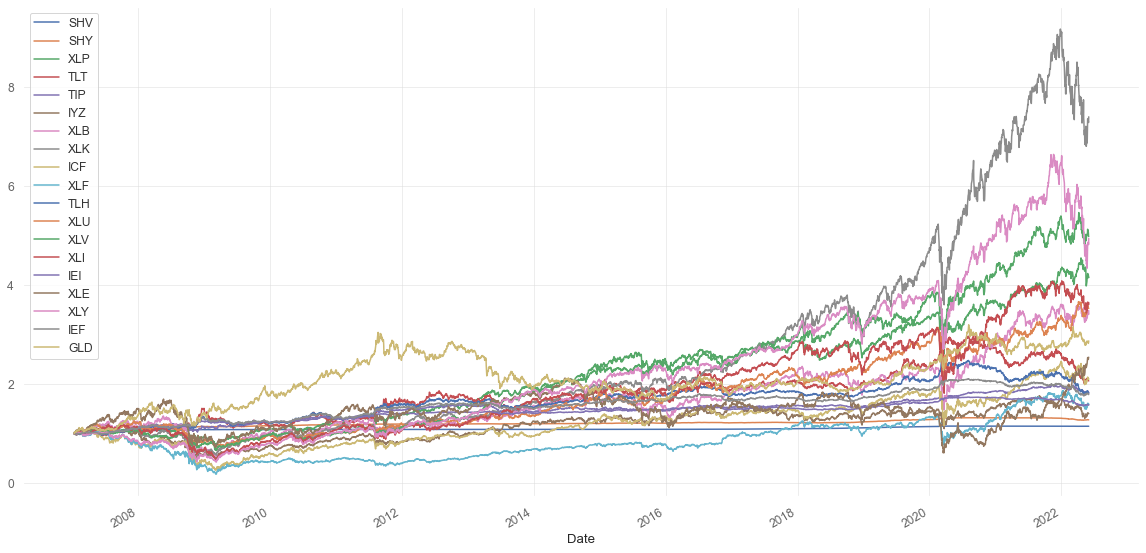

In [16]:
(closeyf/closeyf.iloc[0,]).plot(figsize=(20,10))

In [17]:
# Se calcula en un nuevo DF los retornos logaritmicos
logReturns = pd.DataFrame()
for column in closeyf.columns:
  logReturns[column] = np.log(closeyf[column]/closeyf[column].shift(1)).iloc[1:]

logReturns

,SHV,SHY,XLP,TLT,TIP,IYZ,XLB,XLK,ICF,XLF,TLH,XLU,XLV,XLI,IEI,XLE,XLY,IEF,GLD
Date,,,,,,,,,,,,,,,,,,,
2007-01-12,0.000551,-0.000625,-0.001508,-0.004646,-0.004072,0.003392,0.011132,0.002501,0.002319,0.001082,-0.004993,-0.008328,0.004679,0.002814,0.000100,0.025207,0.002806,-0.002067,0.025083
2007-01-16,-0.000184,0.001000,0.000754,0.002155,0.001732,-0.001356,0.002552,-0.002084,0.017791,0.002699,0.001800,0.003062,0.002331,0.005326,-0.001002,-0.010335,0.003559,0.001944,-0.003222
2007-01-17,0.000552,-0.000375,0.003011,-0.003065,-0.000101,-0.003057,0.003391,-0.013018,-0.000853,-0.002699,-0.000200,0.002221,0.005804,0.000838,-0.000100,0.011056,0.000000,-0.001944,0.010754
2007-01-18,-0.000092,0.000375,-0.001505,0.003065,0.000712,0.007456,-0.005943,-0.011477,-0.003326,-0.004062,-0.000399,-0.000555,0.002889,-0.004479,0.000900,-0.007417,0.005568,0.001338,-0.006085
2007-01-19,-0.000184,-0.000125,0.001505,-0.002724,0.001729,-0.001351,0.015212,-0.000428,0.010888,0.002980,-0.001903,0.000277,0.000289,-0.000561,-0.001101,0.027051,-0.000252,-0.001580,0.011816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,0.000091,0.000240,0.010576,-0.004536,0.004112,0.012649,0.018206,0.023739,-0.002954,0.022843,-0.002896,0.002834,0.004257,0.020083,-0.000083,0.010987,0.047879,-0.000479,-0.001851
2022-05-27,-0.000091,0.000240,0.011533,0.002438,0.003177,0.017953,0.023160,0.033278,0.027487,0.016726,0.002012,0.015510,0.016476,0.020316,0.000165,0.018123,0.033731,0.001438,0.000521
2022-05-31,-0.000272,-0.001559,-0.007092,-0.021389,-0.007121,-0.007655,-0.015341,-0.007166,-0.013112,-0.002815,-0.018339,-0.013895,-0.013446,-0.008098,-0.004974,-0.015137,0.005060,-0.010494,-0.009942


In [18]:
closeyf.iloc[0:,:]

,SHV,SHY,XLP,TLT,TIP,IYZ,XLB,XLK,ICF,XLF,TLH,XLU,XLV,XLI,IEI,XLE,XLY,IEF,GLD
Date,,,,,,,,,,,,,,,,,,,
2007-01-11,96.012306,65.148689,17.709755,56.210281,64.442581,19.405653,24.999762,19.214392,30.833977,22.074303,66.952034,20.991804,26.126059,26.106894,76.038918,34.908733,31.730751,57.395470,60.630001
2007-01-12,96.065254,65.107986,17.683075,55.949738,64.180702,19.471592,25.279610,19.262506,30.905560,22.098196,66.618599,20.817705,26.248589,26.180468,76.046555,35.799858,31.819899,57.276978,62.169998
2007-01-16,96.047600,65.173111,17.696411,56.070461,64.291977,19.445215,25.344196,19.222404,31.460316,22.157923,66.738632,20.881544,26.309839,26.320267,75.970421,35.431786,31.933361,57.388447,61.970001
2007-01-17,96.100624,65.148689,17.749773,55.898876,64.285469,19.385859,25.430294,18.973797,31.433481,22.098196,66.725319,20.927975,26.462978,26.342344,75.962852,35.825684,31.933361,57.276978,62.639999
2007-01-18,96.091766,65.173111,17.723083,56.070461,64.331284,19.530933,25.279610,18.757288,31.329094,22.008612,66.698692,20.916367,26.539551,26.224621,76.031250,35.560932,32.111675,57.353638,62.259998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,110.222977,83.394913,74.139999,118.579041,119.410004,27.049999,85.360001,136.830002,64.230003,34.980000,124.120003,74.209999,131.830002,93.550003,120.798515,86.940002,148.660004,104.129829,172.759995
2022-05-27,110.212982,83.414902,75.000000,118.868523,119.790001,27.540001,87.360001,141.460007,66.019997,35.570000,124.370003,75.370003,134.020004,95.470001,120.818497,88.529999,153.759995,104.279640,172.850006
2022-05-31,110.182999,83.284996,74.470001,116.352997,118.940002,27.330000,86.029999,140.449997,65.160004,35.470001,122.110001,74.330002,132.229996,94.699997,120.219002,87.199997,154.539993,103.191002,171.139999


In [19]:
closeyf = closeyf.iloc[1:,:]

Voy a generar un índice sintético:
https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034


Tengo que evitar el índice esté basado en el precio. Si se basa en precio, sólo por cotización unos ETFs pesar´na más que otros y el índice tendrá un sesgo. Esto es así si los pongo en base 1 y equipondero?

In [21]:
closeyf.head(3)

,SHV,SHY,XLP,TLT,TIP,IYZ,XLB,XLK,ICF,XLF,TLH,XLU,XLV,XLI,IEI,XLE,XLY,IEF,GLD
Date,,,,,,,,,,,,,,,,,,,
2007-01-12,96.065254,65.107986,17.683075,55.949738,64.180702,19.471592,25.279610,19.262506,30.905560,22.098196,66.618599,20.817705,26.248589,26.180468,76.046555,35.799858,31.819899,57.276978,62.169998
2007-01-16,96.047600,65.173111,17.696411,56.070461,64.291977,19.445215,25.344196,19.222404,31.460316,22.157923,66.738632,20.881544,26.309839,26.320267,75.970421,35.431786,31.933361,57.388447,61.970001
2007-01-17,96.100624,65.148689,17.749773,55.898876,64.285469,19.385859,25.430294,18.973797,31.433481,22.098196,66.725319,20.927975,26.462978,26.342344,75.962852,35.825684,31.933361,57.276978,62.639999


In [22]:
precio_cero = (closeyf/closeyf.iloc[0,])
precio_cero.head()

,SHV,SHY,XLP,TLT,TIP,IYZ,XLB,XLK,ICF,XLF,TLH,XLU,XLV,XLI,IEI,XLE,XLY,IEF,GLD
Date,,,,,,,,,,,,,,,,,,,
2007-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-01-16,0.999816,1.001000,1.000754,1.002158,1.001734,0.998645,1.002555,0.997918,1.017950,1.002703,1.001802,1.003067,1.002333,1.005340,0.998999,0.989719,1.003566,1.001946,0.996783
2007-01-17,1.000368,1.000625,1.003772,0.999091,1.001632,0.995597,1.005961,0.985012,1.017082,1.000000,1.001602,1.005297,1.008168,1.006183,0.998899,1.000721,1.003566,1.000000,1.007560
2007-01-18,1.000276,1.001000,1.002263,1.002158,1.002346,1.003048,1.000000,0.973772,1.013704,0.995946,1.001202,1.004739,1.011085,1.001686,0.999799,0.993326,1.009170,1.001338,1.001448
2007-01-19,1.000092,1.000876,1.003772,0.999432,1.004080,1.001693,1.015328,0.973355,1.024802,0.998919,0.999299,1.005018,1.011377,1.001124,0.998699,1.020563,1.008915,0.999758,1.013351


Calculo el peso de cada ETF

In [24]:
peso = 1/precio_cero.shape[1]
peso

0.05263157894736842

In [32]:
ew_index_base_cero = np.sum(precio_cero*peso, axis=1)

In [33]:
ew_index_base_cero

Date
2007-01-12    1.000000
2007-01-16    1.001515
2007-01-17    1.002165
2007-01-18    1.000963
2007-01-19    1.004234
                ...   
2022-05-26    2.812664
2022-05-27    2.860794
2022-05-31    2.835152
2022-06-01    2.818626
2022-06-02    2.840643
Length: 3875, dtype: float64

<AxesSubplot:xlabel='Date'>

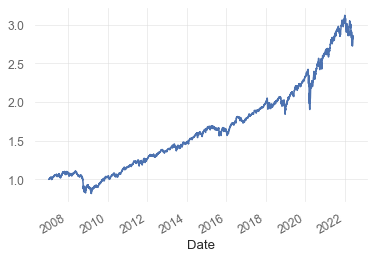

In [34]:
ew_index_base_cero.plot()

Me permite este índice identificar cuáles son los sectores que suben o bajan? Veo dos cosas. La primera es que se identifica la correción del covid (y tiene sentido), o sea que parece que está bien calculado. Lo segundo es que tiene tendencia alcista, porque cuando uno o varios sectores caen, entiendo que el resto tira, pero no veo como sacar info de aquí

Y si hago un índice que vaya teniendo en cuenta los X sectores que más tiran por periodo? Se me ocurre que puedo hacer varios índices y sacar features de cada uno...
En primer lugar, cómo de estables es esa relación de TOP por periodos?

In [122]:
def seleccion_top_X(data, periodo, X):
    '''
       Devuelve df con los activos ordenados por volatildad
       cada día. El índice son fechas, las columnas el orden
       y los valores del DF son los ticker de los activos.

    '''
    data = data.resample(periodo).last()
    # Primero verifico que el df de datos está completo
    rent_activos = np.log(data).diff()
    rent_activos.iloc[0,:] = 0


    ranking = []
    for fila in range(rent_activos.shape[0]):
        ranking.append(rent_activos.iloc[fila, :X].sort_values(ascending=True).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=rent_activos.index)
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

In [126]:
ranking = seleccion_top_X(closeyf,'2M', 5)
ranking

,0,1,2,3,4
Date,,,,,
2007-01-31,SHV,SHY,XLP,TLT,TIP
2007-03-31,XLP,SHV,SHY,TLT,TIP
2007-05-31,TLT,TIP,SHY,SHV,XLP
2007-07-31,XLP,SHV,SHY,TIP,TLT
2007-09-30,SHV,SHY,TLT,TIP,XLP
...,...,...,...,...,...
2021-11-30,SHY,SHV,TIP,XLP,TLT
2022-01-31,TLT,TIP,SHY,SHV,XLP
2022-03-31,TLT,SHY,TIP,SHV,XLP


Prueb commit